**Introduction**

The retail industry generates vast amounts of data daily, providing valuable insights into customer behavior, product performance, and operational efficiency. One such application of data science in retail is BigMart Sales Prediction, which leverages historical sales data to forecast future sales. Accurate sales prediction plays a critical role in optimizing inventory, improving supply chain management, and increasing profitability.

BigMart, a prominent retail chain, aims to harness predictive analytics to understand sales patterns across various stores and products. The dataset for this task typically includes store attributes (size, location, and type), product characteristics (weight, category, and visibility), and historical sales data. By analyzing these features, we can identify key drivers of sales and build a machine learning model to predict future performance

**Import Data**

Import data from **Kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brijbhushannanda1979/bigmart-sales-data")

print("Path to dataset files:", path)

100%|██████████| 307k/307k [00:00<00:00, 66.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/brijbhushannanda1979/bigmart-sales-data/versions/1


**Import Library**

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

**Load Data**

In [3]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'Train.csv')
file_path1 = os.path.join(path, 'Test.csv')

df = pd.read_csv(file_path)
df1 = pd.read_csv(file_path1)

Test.csv
Train.csv


**Data Exploration**

Read data to see preview data

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Preprocessing**

In this Processing we check missing values, duplicated data and fill missing values

Check missing values

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


From comand above we see column `Item_Weight` have 976 missing values and column `Outlet_Size` have missing values 1606

In [ ]:
df.duplicated().sum()

0

No have duplicated data

Fill missing values if numeric use median and if object fill near not missing values

In [5]:
for col in df.select_dtypes(include=['float64', 'int64']):
  if df[col].isnull().any():
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

for col in df.select_dtypes(include='object'):
  if df[col].isnull().any():
    df[col].fillna(method='ffill', inplace=True)
    df[col].fillna(method='bfill', inplace=True)

<ipython-input-5-a3f31f9fff17>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
<ipython-input-5-a3f31f9fff17>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

in column `Item_Fat_Content` LF same as Low Fat and low fat, and reg same as Regular, so we change to same name

In [6]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

**Exploratory Data Analysis**

understand the characteristics, structure, and important components of the dataset before performing further statistical analysis or predictive modeling.

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


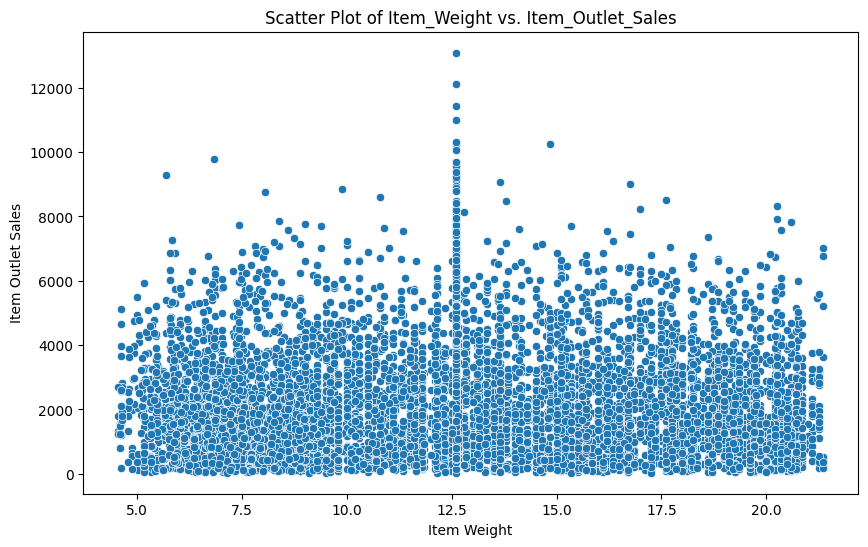

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Scatter Plot of Item_Weight vs. Item_Outlet_Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

From above plotif `Item_Weight` incrase `Item_Outlet_Sales` not incrase

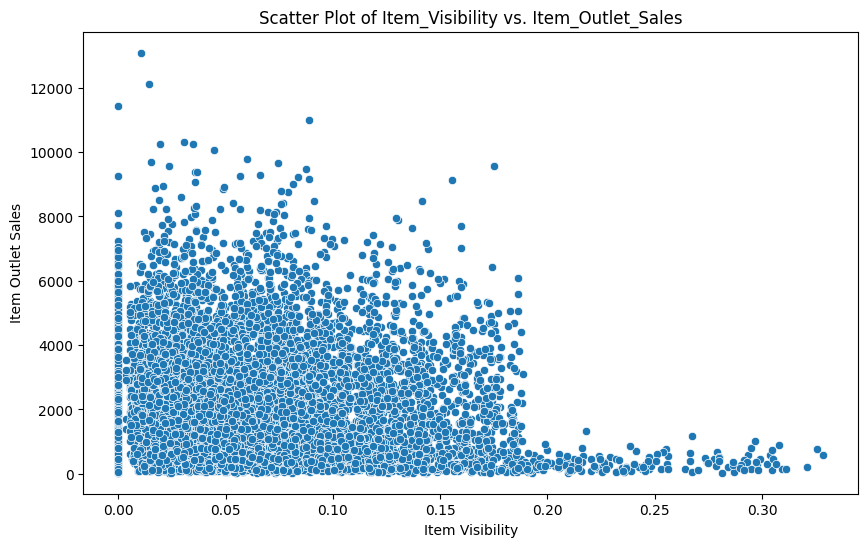

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Scatter Plot of Item_Visibility vs. Item_Outlet_Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

`Item_Visibility` not all linier with `Item_Outlet_Sales`

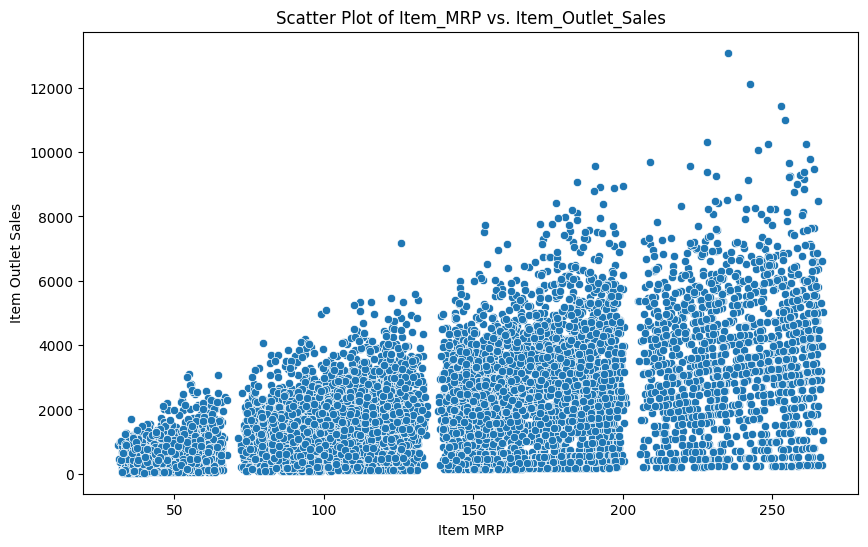

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Scatter Plot of Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


From above plot, `Item_MRP` linier with `Item_Outlet_Sales`, if `Item_MRP` increased `Item_Outlet_Sales` increased too

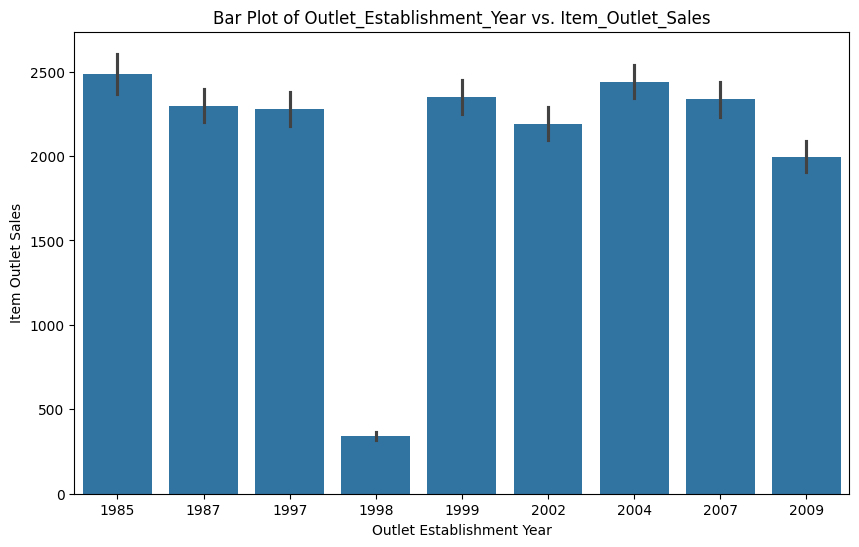

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

`Item_Outlet_Sales` highest in `Outlet_Establishment_Year` 1985, and `Item_Outlet_Sales` lowest in `Outlet_Establishment_Year` 1998

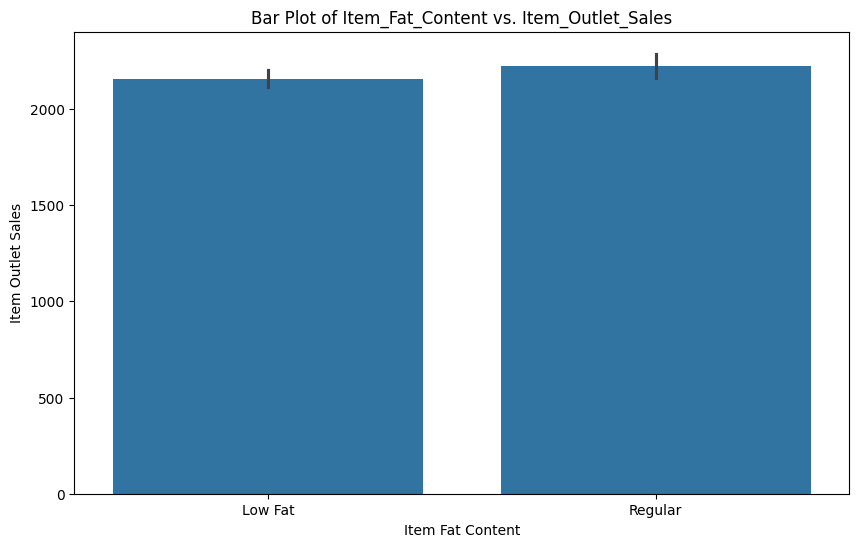

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Item_Fat_Content vs. Item_Outlet_Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

`Item_Fat_Content` with Regular is highest `Item_Outlet_Sales`

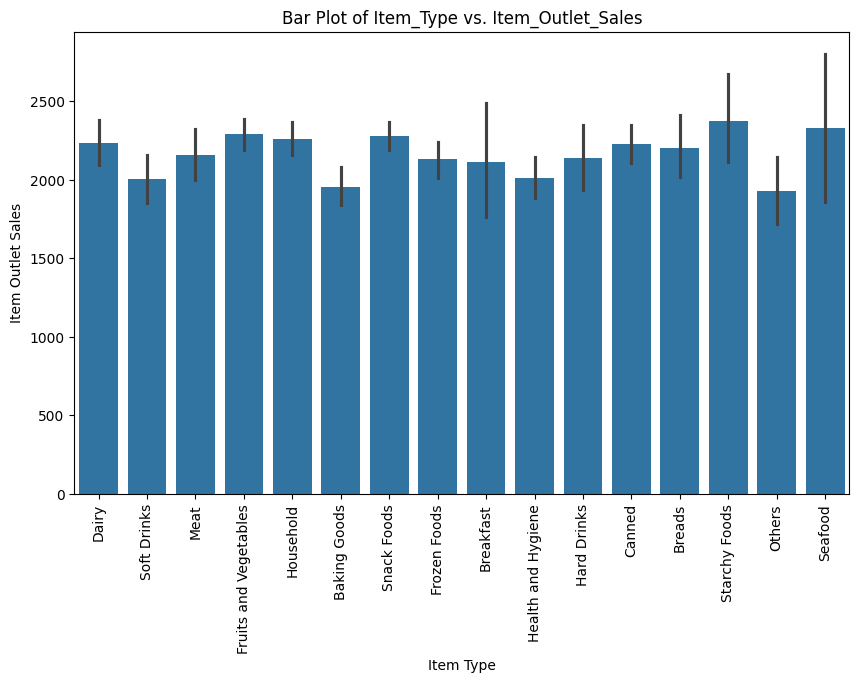

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Item_Type vs. Item_Outlet_Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

`Item_Type` with strachy foods is highest `Item_Outlet_Sales` and `Item_Type` with Others is lowest `Item_Outlet_Sales`

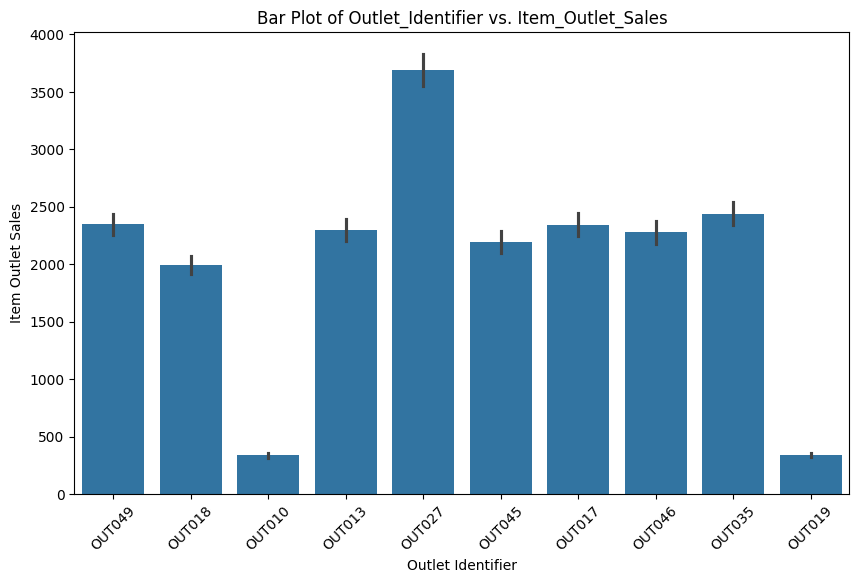

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Outlet_Identifier vs. Item_Outlet_Sales')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

`Outlet_Identifier` with OUT027 is highest `Item_Outlet_Sales` and `Outlet_Identifier` with OUT010 is lowest `Item_Outlet_Sales`

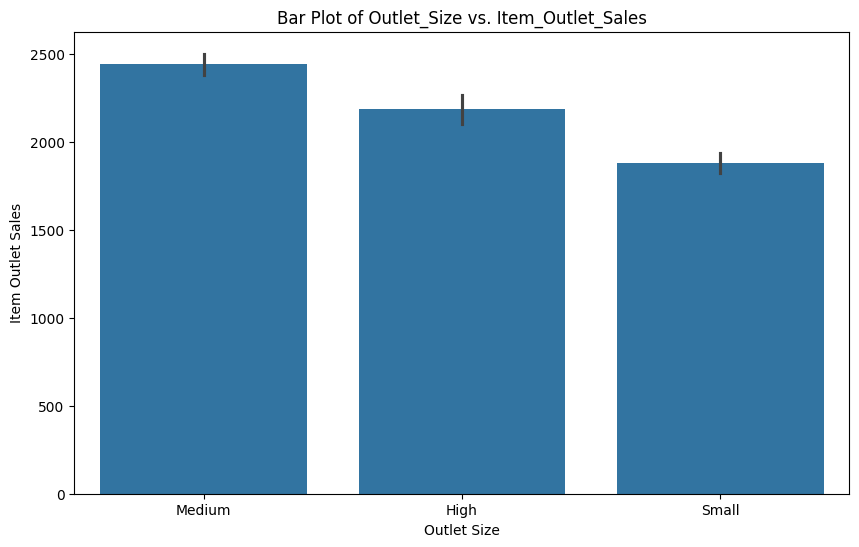

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Outlet_Size vs. Item_Outlet_Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

`Outlet_Size` with type medium is highest `Item_Outlet_Sales` and `Outlet_Size` with type small is lowest `Item_Outlet_Sales`

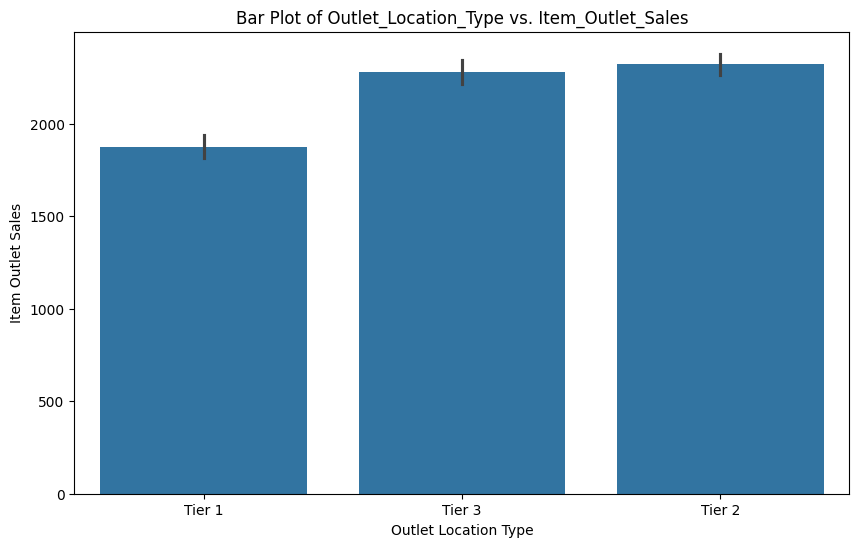

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Outlet_Location_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

`Outlet_Location_Type` with type Tier 2 is highest `Item_Outlet_Sales` and `Outlet_Location_Type` with type Tier 1 is lowest `Item_Outlet_Sales`

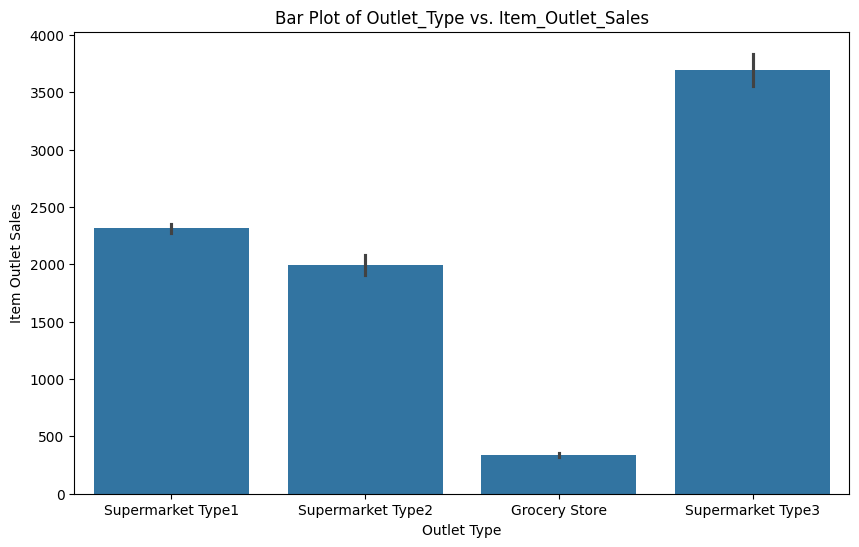

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Bar Plot of Outlet_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

`Outlet_Type` with type Supermarket Type 3 is highest `Item_Outlet_Sales` and `Outlet_Type` with type Grocery Store is lowest `Item_Outlet_Sales`

**Feature Engineering**

Outlet build diferent years, we can find feature engineering from this column, to find age of Outlet

In [7]:
df['age'] = 2024 - df['Outlet_Establishment_Year']

**Label Encoder**

Change type data object to label encoder, because model only use if type data numeric

In [8]:
encoder = LabelEncoder()
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

**Train-Test Split**

Separate target and feature

In [9]:
x = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

**K-Fold Cross Validation**

K-Fold is used to divide the dataset into folds.

In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

**Modeling**

use ensemble to find best RMSPE

Ensemble voting is one of the methods in machine learning that is used to improve the performance and accuracy of the model by combining the prediction results of several different models or algorithms.

In [13]:
gb_regressor = GradientBoostingRegressor()
ada_regressor = AdaBoostRegressor()
rf_regressor = RandomForestRegressor()

voting_regressor = VotingRegressor(estimators=[
    ('gb', gb_regressor),
    ('ada', ada_regressor),
    ('rf', rf_regressor)])

mse_scores = []

voting_regressor.fit(x_train, y_train)

y_pred_vote = voting_regressor.predict(x_val)

mape_error_vot = np.mean(np.abs((y_val - y_pred_vote) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_vot:.2f}%')

Mean Absolute Percentage Error (MAPE): 87.23%


From above model we find MAPE is 87.23%, model is bad to predict validation

Stacking Ensemble is a technique in machine learning that combines prediction results from several base learners using another model called a meta-learner.

In [15]:
base_learners = [
    ('gb', GradientBoostingRegressor()),
    ('ada', AdaBoostRegressor()),
    ('rf', RandomForestRegressor())
]

stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())

stacking_regressor.fit(x_train, y_train)

y_pred_stack = stacking_regressor.predict(x_val)

mape_error_stack = np.mean(np.abs((y_val - y_pred_stack) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_stack:.2f}%')

Mean Absolute Percentage Error (MAPE): 58.63%


From above model we find MAPE is 58.63 %, model is still bad to predict validation

**Hyperparameter Tuning**

Hyperparameter Tuning is the process of finding the optimal value of the hyperparameters of a machine learning model to improve the performance of the model.

In [16]:
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_grid.fit(x_train, y_train)
gb_best = gb_grid.best_estimator_

# AdaBoostRegressor Hyperparameter Tuning
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_grid = GridSearchCV(AdaBoostRegressor(), ada_params, scoring='neg_mean_absolute_error', cv=3)
ada_grid.fit(x_train, y_train)
ada_best = ada_grid.best_estimator_

# RandomForestRegressor Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, scoring='neg_mean_absolute_error', cv=3)
rf_grid.fit(x_train, y_train)
rf_best = rf_grid.best_estimator_

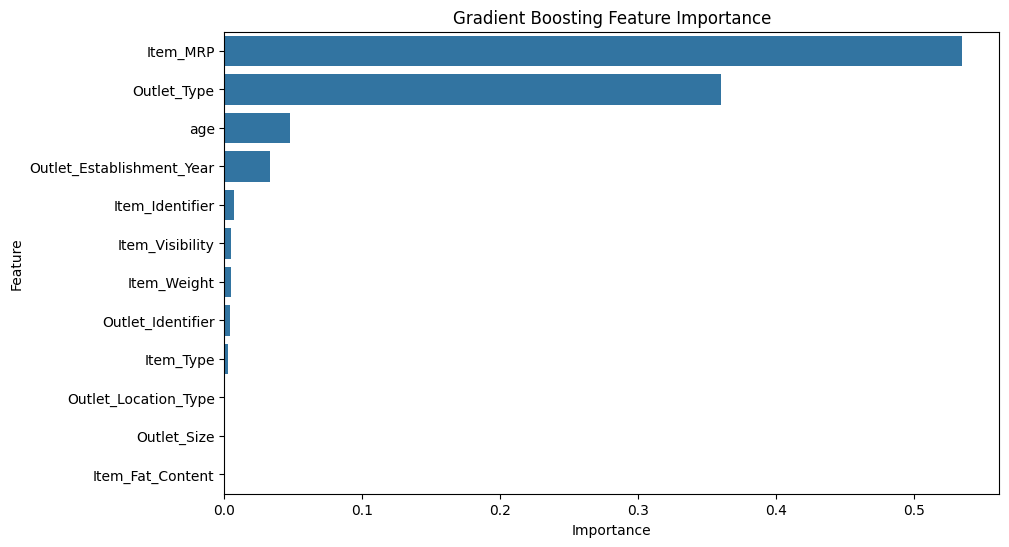

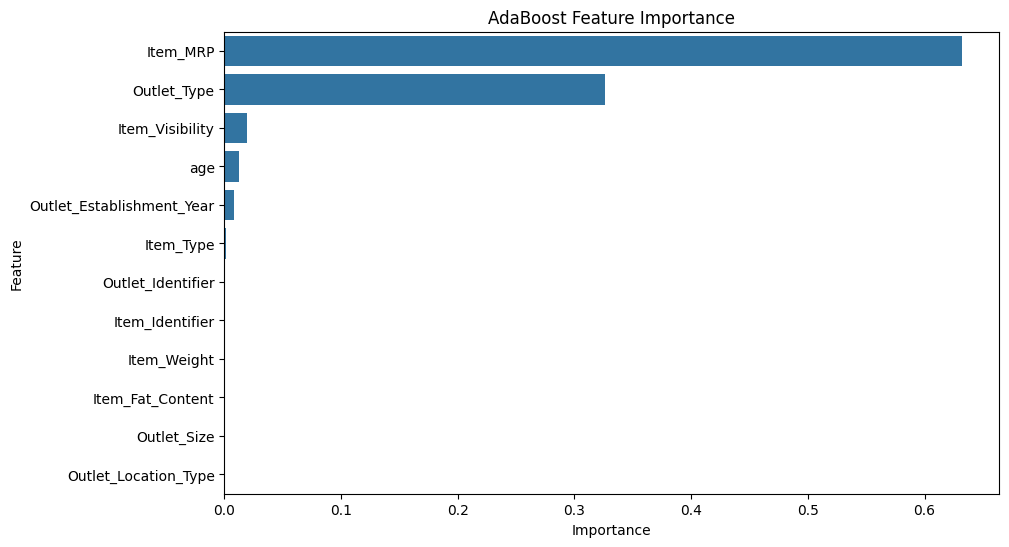

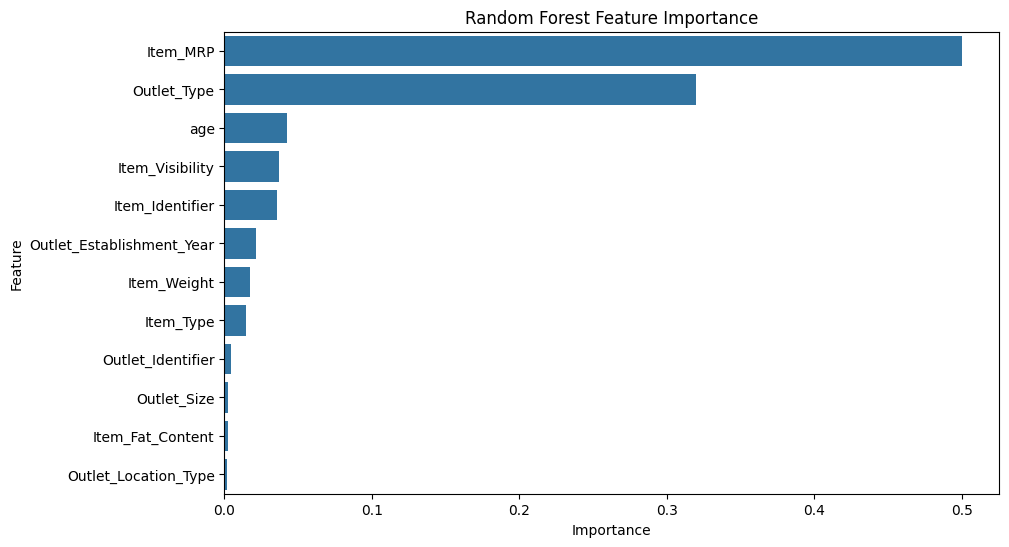

In [17]:
# Gradient Boosting Regressor
gb_feature_importances = gb_best.feature_importances_

# AdaBoost Regressor
ada_feature_importances = ada_best.feature_importances_

# Random Forest Regressor
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances})

# Sort by importance
gb_importance_df = gb_importance_df.sort_values('Importance', ascending=False)
ada_importance_df = ada_importance_df.sort_values('Importance', ascending=False)
rf_importance_df = rf_importance_df.sort_values('Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ada_importance_df)
plt.title('AdaBoost Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

from 3 model above feature importance same is `Item_MRP` and `Outlet_type`, 3 week feature importance is `Item_Fat_COntent`, `Outlet_Size` and `Outlet_Location_Type`

In [19]:
# VotingRegressor with best parameters
voting_regressor = VotingRegressor(estimators=[
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)])

voting_regressor.fit(x_train, y_train)
y_pred_v = voting_regressor.predict(x_val)

mape_error_vh = np.mean(np.abs((y_val - y_pred_v) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_vh:.2f}%')

Mean Absolute Percentage Error (MAPE): 64.66%


After hyperparameter tuning with voting, result model incrase, we got MAPE 64%

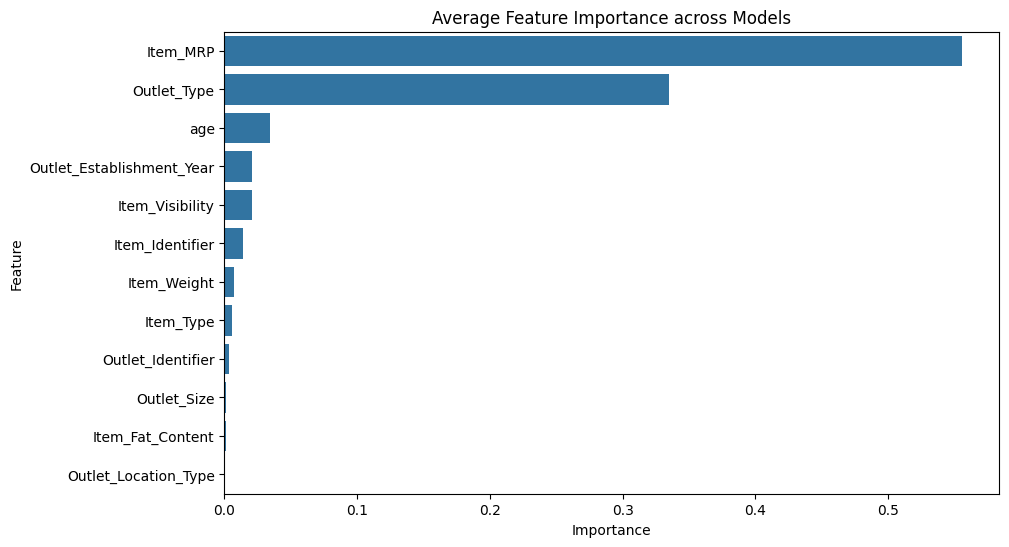

In [20]:
# Access feature importances from the trained models
gb_feature_importances = gb_best.feature_importances_
ada_feature_importances = ada_best.feature_importances_
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances, 'Model': 'Gradient Boosting'})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances, 'Model': 'AdaBoost'})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df = pd.concat([gb_importance_df, ada_importance_df, rf_importance_df])

# Calculate average importance across models
average_importance = importance_df.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance = average_importance.sort_values('Importance', ascending=False)


# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance)
plt.title('Average Feature Importance across Models')
plt.show()

Merge 3 model for find feature importance with voting, we get `Item_MRP` and `Outlet_type` is still high effect for this result, 3 feature importance still low effect is `Outlet_Size`, `Item_Fat_Content` and `Outlet_Location_type`

Stacking with hyperparameter tuning

In [21]:
base_learners = [
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)]

# Final estimator hyperparameter tuning
ridge_params = {'final_estimator__alpha': [0.1, 1.0, 10.0]}
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=Ridge())

stacking_grid = GridSearchCV(stacking_regressor, ridge_params, scoring='neg_mean_absolute_error', cv=3)
stacking_grid.fit(x_train, y_train)

# Best model
stacking_best = stacking_grid.best_estimator_

# Predict and evaluate
y_pred_sh = stacking_best.predict(x_val)
mape_error_sh = np.mean(np.abs((y_val - y_pred_sh) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_sh:.2f}%')

Mean Absolute Percentage Error (MAPE): 58.87%


with stacking result tuning MAPE is 58.87%

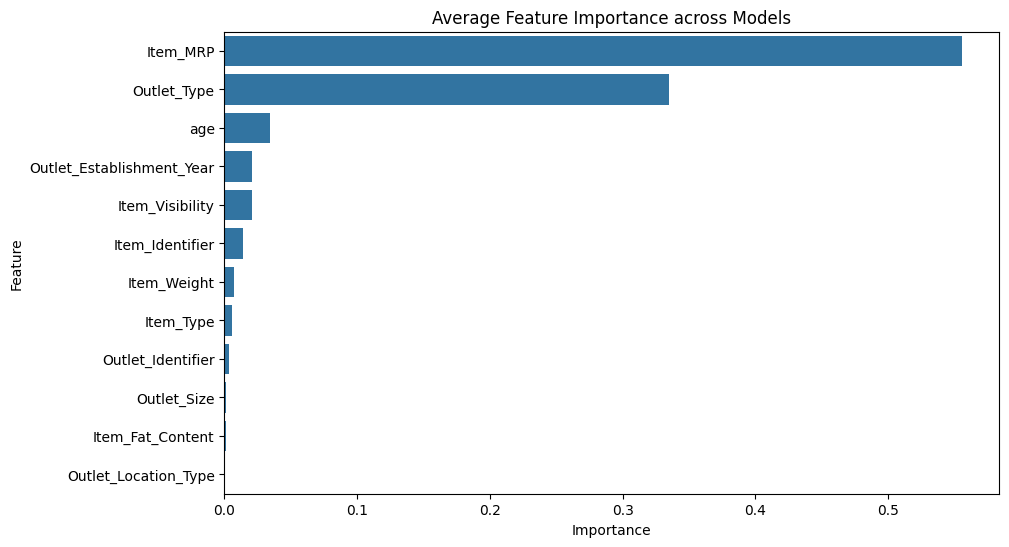

In [23]:
# Access feature importances from the trained models
gb_feature_importances = gb_best.feature_importances_
ada_feature_importances = ada_best.feature_importances_
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances, 'Model': 'Gradient Boosting'})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances, 'Model': 'AdaBoost'})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df = pd.concat([gb_importance_df, ada_importance_df, rf_importance_df])

# Calculate average importance across models
average_importance = importance_df.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance = average_importance.sort_values('Importance', ascending=False)


# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance)
plt.title('Average Feature Importance across Models')
plt.show()

Same as voting Merge 3 model for find feature importance, we get `Item_MRP` and `Outlet_type` is still high effect for this result, 3 feature importance still low effect is `Outlet_Size`, `Item_Fat_Content` and `Outlet_Location_type`

**Feature Selction**

From above feature importance, we will use only high importance feature ini this step

In [24]:
xs = df.drop(['Item_Outlet_Sales','Outlet_Size', 'Item_Fat_Content', 'Outlet_Location_Type'], axis=1)
ys = df['Item_Outlet_Sales']

In [25]:
kfs = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, val_idx in kfs.split(x):
    xs_train, xs_val = xs.iloc[train_idx], xs.iloc[val_idx]
    ys_train, ys_val = ys.iloc[train_idx], ys.iloc[val_idx]

Model with tunning parameters with feature selection

In [26]:
gbs_params = {
    'n_estimators': [300, 500],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 5]
}
gbs_grid = GridSearchCV(GradientBoostingRegressor(), gbs_params, scoring='neg_mean_absolute_error', cv=5)
gbs_grid.fit(xs_train, ys_train)
gbs_best = gbs_grid.best_estimator_

# AdaBoostRegressor Hyperparameter Tuning
adas_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001, 0.01, 0.1]
}
adas_grid = GridSearchCV(AdaBoostRegressor(), adas_params, scoring='neg_mean_absolute_error', cv=5)
adas_grid.fit(xs_train, ys_train)
adas_best = adas_grid.best_estimator_

# RandomForestRegressor Hyperparameter Tuning
rfs_params = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rfs_grid = GridSearchCV(RandomForestRegressor(), rfs_params, scoring='neg_mean_absolute_error', cv=5)
rfs_grid.fit(xs_train, ys_train)
rfs_best = rfs_grid.best_estimator_

Feature Importance each model with adjust tuning and feature selection

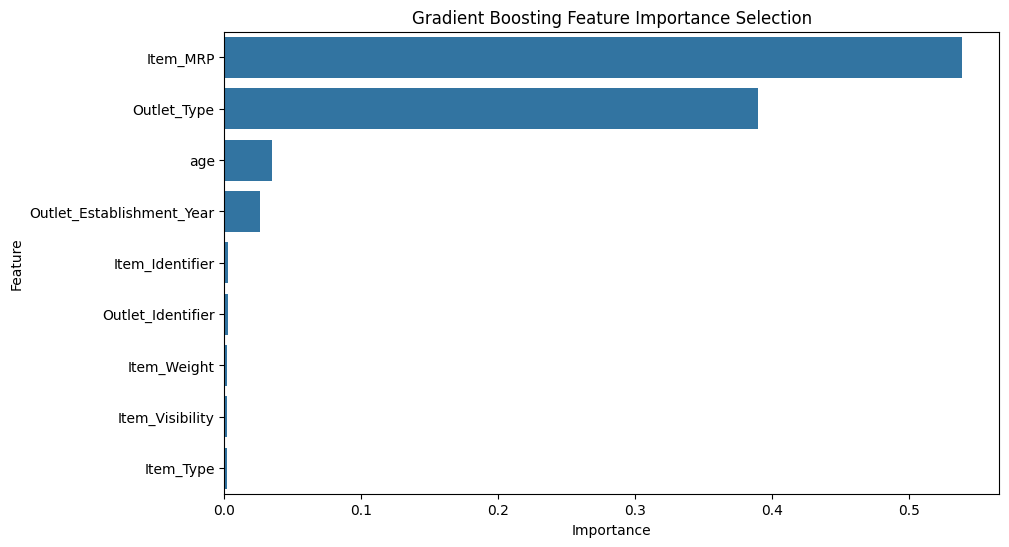

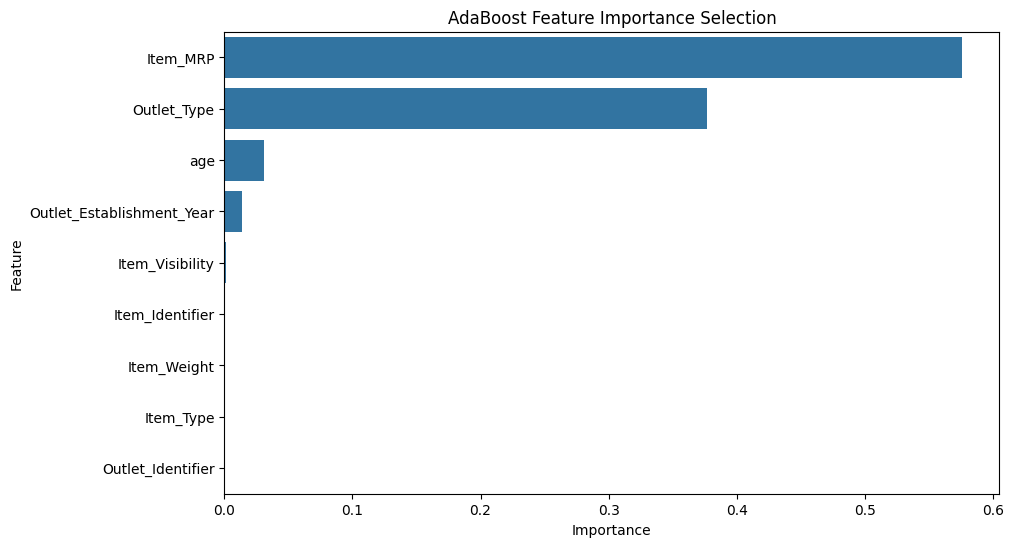

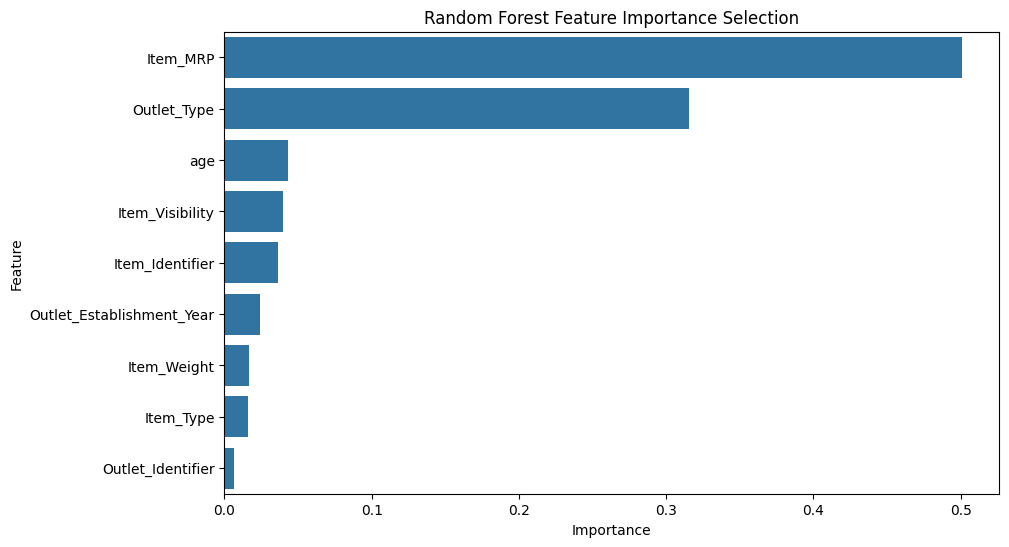

In [27]:
# Gradient Boosting Regressor
gbs_feature_importances = gbs_best.feature_importances_

# AdaBoost Regressor
adas_feature_importances = adas_best.feature_importances_

# Random Forest Regressor
rfs_feature_importances = rfs_best.feature_importances_

# Create DataFrames for visualization
gbs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': gbs_feature_importances})
adas_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': adas_feature_importances})
rfs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': rfs_feature_importances})

# Sort by importance
gbs_importance_df = gbs_importance_df.sort_values('Importance', ascending=False)
adas_importance_df = adas_importance_df.sort_values('Importance', ascending=False)
rfs_importance_df = rfs_importance_df.sort_values('Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gbs_importance_df)
plt.title('Gradient Boosting Feature Importance Selection')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=adas_importance_df)
plt.title('AdaBoost Feature Importance Selection')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rfs_importance_df)
plt.title('Random Forest Feature Importance Selection')
plt.show()

Voting with Feature Selection

In [28]:
# VotingRegressor with best parameters
voting_regressor_s = VotingRegressor(estimators=[
    ('gb', gbs_best),
    ('ada', adas_best),
    ('rf', rfs_best)])

voting_regressor_s.fit(xs_train, ys_train)
y_pred_shs = voting_regressor_s.predict(xs_val)

mape_error_vhs = np.mean(np.abs((y_val - y_pred_shs) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_vhs:.2f}%')

Mean Absolute Percentage Error (MAPE): 57.11%


After use feature selection we got MAPE 57.11%, incrase from before

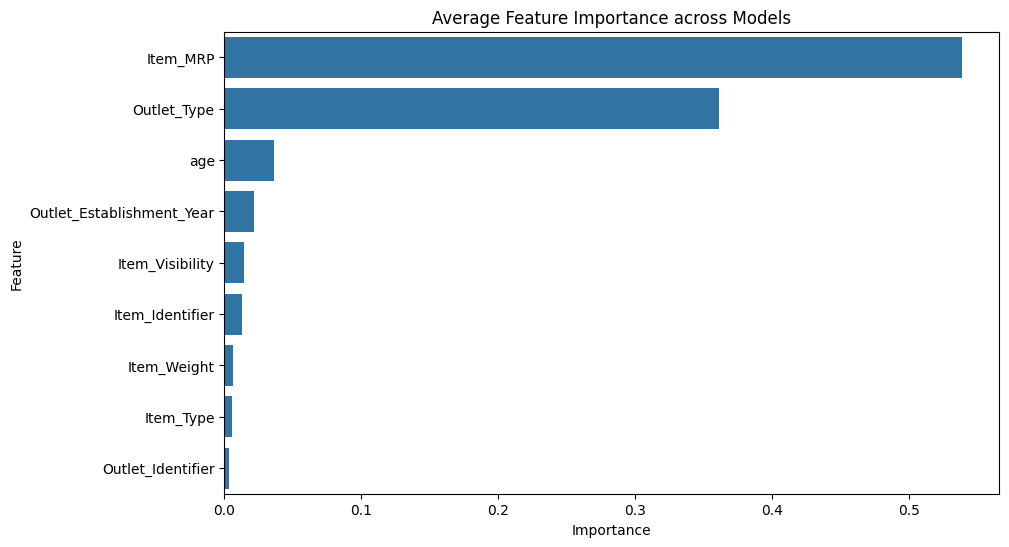

In [29]:
# Access feature importances from the trained models
gbs_feature_importances = gbs_best.feature_importances_
adas_feature_importances = adas_best.feature_importances_
rfs_feature_importances = rfs_best.feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gbs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': gbs_feature_importances, 'Model': 'Gradient Boosting'})
adas_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': adas_feature_importances, 'Model': 'AdaBoost'})
rfs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': rfs_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df_s = pd.concat([gbs_importance_df, adas_importance_df, rfs_importance_df])

# Calculate average importance across models
average_importance_s = importance_df_s.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance_s = average_importance_s.sort_values('Importance', ascending=False)


# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance_s)
plt.title('Average Feature Importance across Models')
plt.show()

From feature selection model voting above feature `Item_MRP` and `Outlet_Type` is high effect model

Stacking with feature selection and tuning

In [30]:
base_learners_s = [
    ('gb', gbs_best),
    ('ada', adas_best),
    ('rf', rfs_best)]

# Final estimator hyperparameter tuning
ridge_params_s = {'final_estimator__alpha': [0.001, 0.01, 0.1]}
stacking_regressor_s = StackingRegressor(estimators=base_learners_s, final_estimator=Ridge())

stacking_grid_s = GridSearchCV(stacking_regressor_s, ridge_params_s, scoring='neg_mean_absolute_error', cv=5)
stacking_grid_s.fit(xs_train, ys_train)

# Best model
stacking_best_s = stacking_grid_s.best_estimator_

# Predict and evaluate
y_pred_sfs = stacking_best_s.predict(xs_val)
mape_error_sfs = np.mean(np.abs((y_val - y_pred_sfs) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_sfs:.2f}%')

Mean Absolute Percentage Error (MAPE): 54.82%


After use feature selection we got MAPE 54.82%, incrase from before

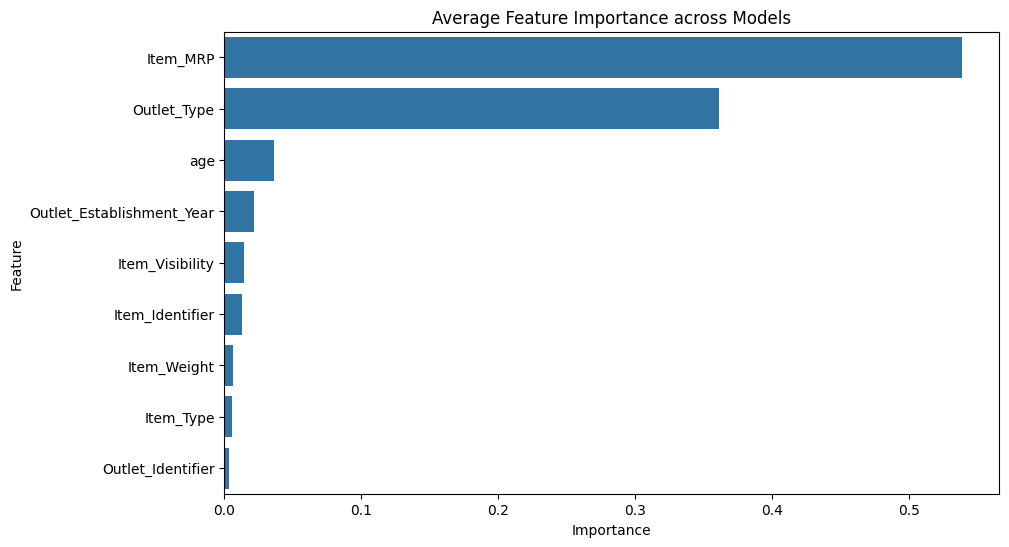

In [31]:
# Access feature importances from the trained models
gb_feature_importances = gbs_best.feature_importances_
ada_feature_importances = adas_best.feature_importances_
rf_feature_importances = rfs_best.feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gbs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': gbs_feature_importances, 'Model': 'Gradient Boosting'})
adas_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': adas_feature_importances, 'Model': 'AdaBoost'})
rfs_importance_df = pd.DataFrame({'Feature': xs_train.columns, 'Importance': rfs_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df_s = pd.concat([gbs_importance_df, adas_importance_df, rfs_importance_df])

# Calculate average importance across models
average_importance_s = importance_df_s.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance_s = average_importance_s.sort_values('Importance', ascending=False)


# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance_s)
plt.title('Average Feature Importance across Models')
plt.show()

**Conclusion**

Model stacking with feature selection adn hyperparameter tuning is best model with MAPE 54.82%, feature importance with high effects is `Item_MRP` and `Outlet_type`

**Reference**

https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data